In [42]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
  
# Loading data
irisData = load_iris()
  
# Create feature and target arrays
X = irisData.data
y = irisData.target
  
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
  
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)
  
# Calculate the accuracy of the model
print(knn.score(X_test, y_test))

0.9666666666666667


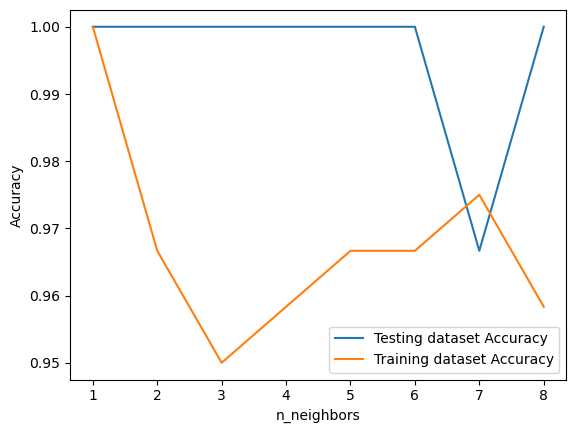

In [43]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
  
irisData = load_iris()
  
# Create feature and target arrays
X = irisData.data
y = irisData.target
  
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
  
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [44]:
import pandas as pd
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases"
       "/abalone/abalone.data")
url

'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'

In [45]:
abalone = pd.read_csv(url, header=None)
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


https://archive.ics.uci.edu/dataset/1/abalone

In [46]:
abalone.columns = [
...     "Sex",
...     "Length",
...     "Diameter",
...     "Height",
...     "Whole weight",
...     "Shucked weight",
...     "Viscera weight",
...     "Shell weight",
...     "Rings",
... ]

The goal of the current exercise is to use physical measurements to predict the age of the abalone. Since sex is not a purely physical measure, you should remove it from the dataset.

In [47]:
abalone = abalone.drop("Sex", axis=1)

The decision to use fifteen bins is based on a few trials. When defining the number of bins, you generally try to have neither too many observations per bin nor too few. Too few bins can hide certain patterns, while too many bins can make the histogram lack smoothness. 

Width of each bin is = (max value of data – min value of data) / total number of bins

bins itu banyaknya tabung

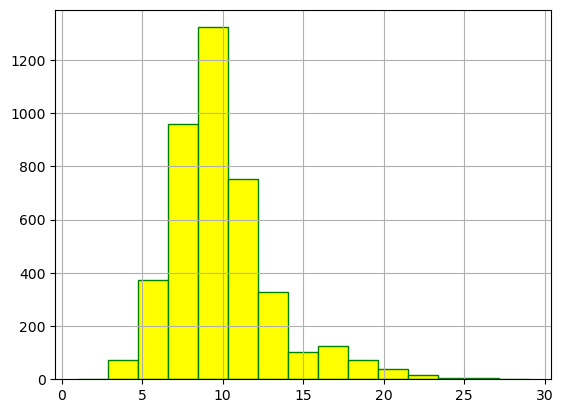

In [48]:
import matplotlib.pyplot as plt
abalone["Rings"].hist(bins=15, edgecolor = "green", color = "yellow")
plt.show()

<Axes: >

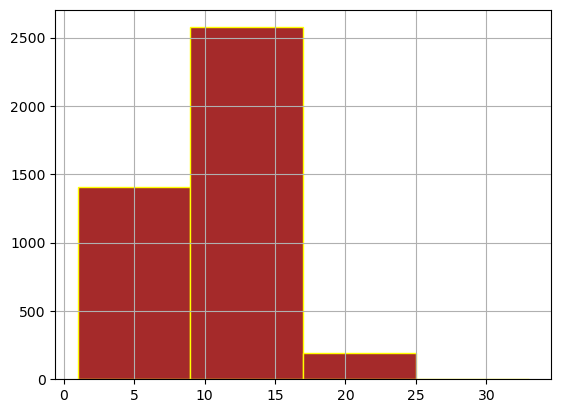

In [49]:
binwidth = 8
abalone["Rings"].hist(bins=range(min(abalone["Rings"]), max(abalone["Rings"]) + binwidth, binwidth),
         edgecolor="yellow", color="brown")

<Axes: >

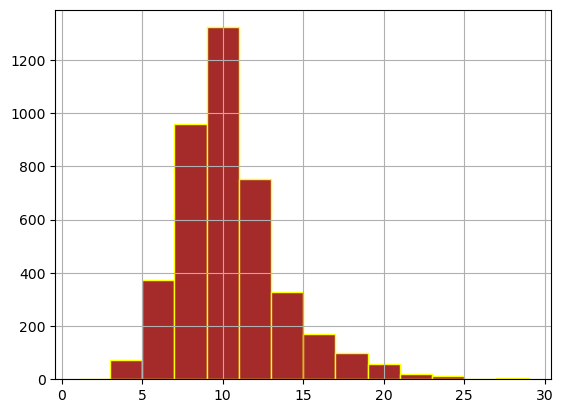

In [50]:
binwidth = 2
abalone["Rings"].hist(bins=range(min(abalone["Rings"]), max(abalone["Rings"]) + binwidth, binwidth),
         edgecolor="yellow", color="brown")

<Axes: >

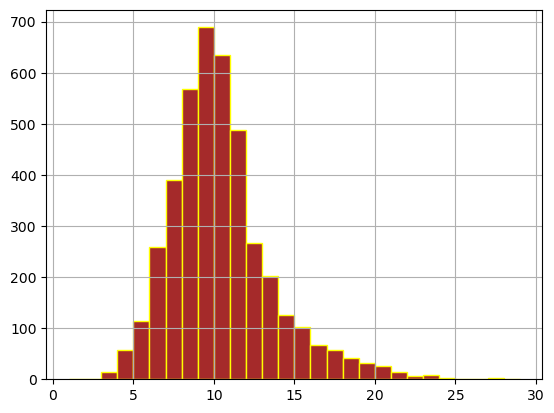

In [51]:
binwidth = 1
abalone["Rings"].hist(bins=range(min(abalone["Rings"]), max(abalone["Rings"]) + binwidth, binwidth),
         edgecolor="yellow", color="brown")

In [52]:
correlation_matrix = abalone.corr()
correlation_matrix['Rings']

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

Define Nearest Using Math

## Syntax: numpy.linalg.norm(x, ord=None, axis=None)

Parameters: 
x: input 
ord: order of norm 
axis: None, returns either a vector or a matrix norm and if it is an integer value, it specifies the axis of x along which the vector norm will be computed 

In [53]:
# Datanya harus dalam bentuk vektor 
import numpy as np
a = np.array([2, 2])
b = np.array([4, 4])
np.linalg.norm(a - b)

2.8284271247461903

In [54]:
X = abalone.drop("Rings", axis = 1)
X = X.values
Y = abalone["Rings"]
Y = Y.values

In [55]:
new_data_point = np.array([
...     0.569552,
...     0.446407,
...     0.154437,
...     1.016849,
...     0.439051,
...     0.222526,
...     0.291208,
... ])

In [56]:
distances = np.linalg.norm(X - new_data_point, axis=1)

## Syntax : numpy.argsort(arr, axis=-1, kind=’quicksort’, order=None) 

Parameters:

1. arr : [array_like] Input array. 
2. axis : [int or None] Axis along which to sort. If None, the array is flattened before sorting. The default is -1, which sorts along the last axis. 
3. kind : [‘quicksort’, ‘mergesort’, ‘heapsort’]Selection algorithm. Default is ‘quicksort’. 
4. order : [str or list of str] When arr is an array with fields defined, this argument specifies which fields to compare first, second, etc. 
5. Return: [index_array, ndarray] Array of indices that sort arr along the specified axis.If arr is one-dimensional then arr[index_array] returns a sorted arr.



In [57]:
k = 3
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

array([4045, 1902, 1644], dtype=int64)

In [58]:
# combine those neighbours into a prediction for your new data point
nearest_neighbor_rings = Y[nearest_neighbor_ids]
nearest_neighbor_rings

array([ 9, 11, 10], dtype=int64)

In [59]:
prediction = nearest_neighbor_rings.mean()

In [60]:
prediction

10.0

This means that the 3-Nearest Neighbor prediction for your new data point is 10. You could do the same for any number of new abalones that you want.

## Mode FOr Classification


In [61]:
import scipy.stats
class_neighbors = np.array(['A', 'B', 'B', 'C'])
scipy.stats.mode(class_neighbors)

C:\Users\pc\AppData\Local\Temp\ipykernel_6952\3631445765.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  scipy.stats.mode(class_neighbors)
C:\Users\pc\AppData\Local\Temp\ipykernel_6952\3631445765.py:3: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  scipy.stats.mode(class_neighbors)


ModeResult(mode=array(['B'], dtype='<U1'), count=array([2]))

Syntax:

## scipy.stats.circmean(array, high=2*pi, low=0, axis=None, nan_policy=’propagate’)

where,

1. Array – input array or samples.
2. high (float or int ) – high boundary for sample. default high = 2 * pi.
3. low ( float or int )  – low boundary for sample. default low = 0.
4. axis ( int ) – Axis along which means are computed.
5. nan_policy ( ‘propagate’, ‘raise’, ‘omit’ ) – Defines how to handle when input contains nan. ‘propagate’ returns nan, ‘raise’ throws an error, and ‘omit’ performs the calculations ignoring nan values. The default is ‘propagate’.

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12345)

## Fiiting

In [63]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

In [64]:
knn_model.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=3)

In [65]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(Y_train, train_preds)
rmse = sqrt(mse)
rmse

1.6538366794859511

In [66]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(Y_test, test_preds)
rmse = sqrt(mse)
rmse

2.375417924000521

This more-realistic RMSE is slightly higher than before. The RMSE measures the average error of the predicted age, so you can interpret this as having, on average, an error of 1.65 years. Whether an improvement from 2.37 years to 1.65 years is good is case specific. At least you’re getting closer to correctly estimating the age. (overfitting)

## Plotting

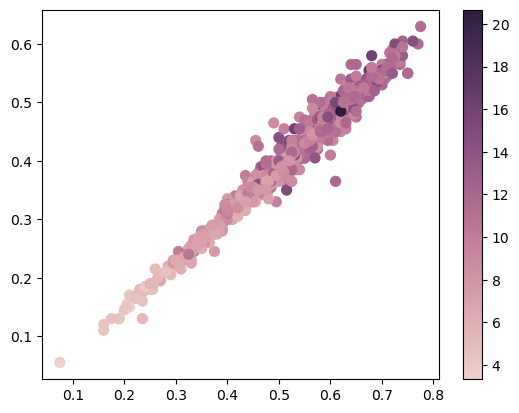

In [67]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
X_test[:,0], X_test[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()
# 0 itu lenght, 1 itu diameternya 

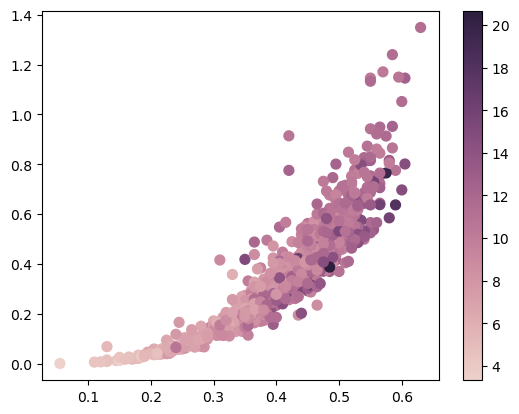

In [68]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
X_test[:,1], X_test[:, 4], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

## Tune and Optimize kNN in Python Using scikit-learn
There are numerous ways you can improve your predictive score. Some improvements could be made by working on the input data using data wrangling, but in this tutorial, the focus is on the kNN algorithm. Next, you’ll look at ways to improve the algorithm part of the modeling pipeline.

In [69]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1,50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [70]:
gridsearch.best_params_

{'n_neighbors': 25}

In [71]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(Y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
train_rmse

2.0731180327543384

In [72]:
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(Y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

2.1700197339962175

With this code, you fit the model on the training data and evaluate the test data. You can see that the training error is worse than before, but the test error is better than before. This means that your model fits less closely to the training data. Using GridSearchCV to find a value for k has reduced the problem of overfitting on the training data

In [73]:
parameters = {
...     "n_neighbors": range(1, 50),
...     "weights": ["uniform", "distance"],
... }
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [74]:
gridsearch.best_params_

{'n_neighbors': 25, 'weights': 'distance'}

In [75]:
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(Y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

2.1634265584947485

 Applying a weighted average rather than a regular average has reduced the prediction error from 2.17 to 2.1634. Although this isn’t a huge improvement, it’s still better, which makes it worth it.

## Bagging

uses decision trees

In [76]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor(n_neighbors=best_k, weights=best_weights)

In [81]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
base_model = DecisionTreeRegressor()
bagging_model = BaggingRegressor(bagged_knn, n_estimators= 100)
bagging_model.fit(X_train, Y_train)



BaggingRegressor(estimator=KNeighborsRegressor(n_neighbors=25,
                                               weights='distance'),
                 n_estimators=100)

In [82]:
test_mse = mean_squared_error(Y_test, test_preds_grid)
test_rmse = sqrt(test_mse)


In [83]:
test_preds_grid = bagging_model.predict(X_test)
test_mse = mean_squared_error(Y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

2.162826005602649

## Kesimpulan:
1. Arbitary k = 2.37
2. GridsearchCV for k = 2.17
3. GridSearchCV for k and weights = 2.163
4. Bagging and Grid = 2.1616